# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Membuat Input X

In [2]:
X = np.random.randint(20, size=(1000,5))
X = pd.DataFrame(X)
X.columns = ['x1', 'x2', 'x3', 'x4', 'x5']
X

,x1,x2,x3,x4,x5
0,5,13,0,17,4
1,17,14,19,16,11
2,9,0,13,15,6
3,6,16,19,9,7
4,18,0,7,13,9
...,...,...,...,...,...
995,3,3,2,17,18
996,13,3,14,1,1
997,7,14,3,2,17
998,13,17,10,5,5


# Membuat Output y

In [3]:
y = 5*X['x1'] + 0.1*(X['x2']**2) + 30*(X['x3']**0.5) + X['x4']*X['x5'] + 50
#y = y + np.random.randint(50, size=(1000)) - 25
y

0      159.900000
1      461.366968
2      293.166538
3      299.366968
4      336.372539
          ...    
995    414.326407
996    229.149722
997    190.561524
998    263.768330
999    404.026407
Length: 1000, dtype: float64

# Split Data

In [4]:
X_train = X.loc[0:799]

X_valid = X.loc[800:999]
X_valid.index = range(200)

y_train = y[0:800]

y_valid = y[800:1000]
y_valid.index = range(200)

print(X_train)
print(X_valid)
print(y_train)
print(y_valid)

     x1  x2  x3  x4  x5
0     5  13   0  17   4
1    17  14  19  16  11
2     9   0  13  15   6
3     6  16  19   9   7
4    18   0   7  13   9
..   ..  ..  ..  ..  ..
795  12   1  13   2  10
796   7   6   8   6  14
797   5  12  13  12  16
798  13   8  18   7   5
799  13  10   0   0  16

[800 rows x 5 columns]
     x1  x2  x3  x4  x5
0     9  11  12   9   6
1     7  19   6  17   5
2    10   2   4  18  16
3     2  19   1  16  19
4     0   5   9  10  11
..   ..  ..  ..  ..  ..
195   3   3   2  17  18
196  13   3  14   1   1
197   7  14   3   2  17
198  13  17  10   5   5
199   8  14   2  18  14

[200 rows x 5 columns]
0      159.900000
1      461.366968
2      293.166538
3      299.366968
4      336.372539
          ...    
795    238.266538
796    257.452814
797    389.566538
798    283.679221
799    125.000000
Length: 800, dtype: float64
0      265.023048
1      279.584692
2      448.400000
3      430.100000
4      252.500000
          ...    
195    414.326407
196    229.149722
197   

# Linear Regression

Mean absolute percentage error (MAPE): 0.11
Root mean squared error (RMSE): 37.08
Coefficient of determination (R2): 0.82
-18.454562775670013
[5.1079547  2.21846883 5.89549439 9.43385123 9.36531912]


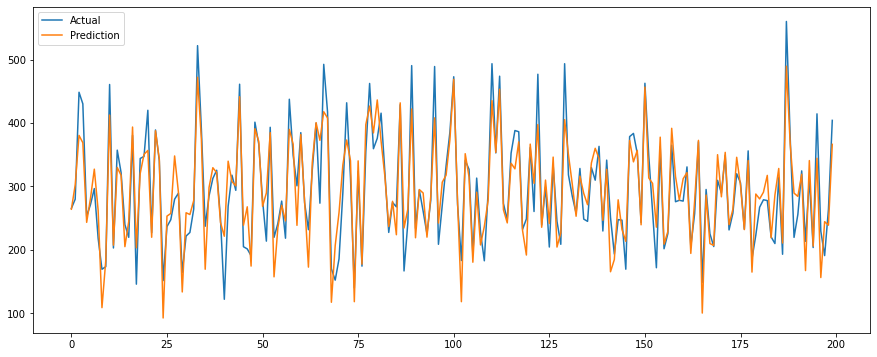

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()